In [175]:
# look at the TTS of various segments 
# date created: 3/3/2020
# author: sofia chelpon

In [1]:
############ --------------- PREP WORKSPACE --------------- ###########
import numpy as np 
import pandas as pd
import xarray as xr 

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
%config inlinebackend.figure_format='retina'

# import my TTS module, need to add path to folder
import sys
sys.path.insert(1, '/Volumes/scdrive2/TTS_2020/base_tts_code/')
import tts_mod

In [4]:
############ --------------- LOAD SEGMENT DATA --------------- ###########
utbl_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/twp_awas_replace_082020/utbl_allseg_campavgbl_tropotau_twp_awas_replace.pkl')
mustar_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/twp_awas_replace_082020/mustar_allseg_campavgbl_tropotau_twp_awas_replace.pkl')
tau_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/twp_awas_replace_082020/tau_allseg_campavgbl_tropotau_twp_awas_replace.pkl')
t_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/twp_awas_replace_082020/t_allseg_campavgbl_tropotau_twp_awas_replace.pkl')
gf_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/twp_awas_replace_082020/gf_allseg_campavgbl_tropotau_twp_awas_replace.pkl')
seg_info = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/twp_awas_replace_082020/segment_info_campavgbl_tropotau_twp_awas_replace.pkl')
trcnames_allseg = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/twp_awas_replace_082020/trcnames_allseg.pkl")

In [6]:
############ --------------- FILTER BY R^2 VALUES --------------- ###########
high_r2_idx = np.ndarray.flatten(np.argwhere(seg_info['r squared'].values >= 0.65))

seg_info_screened = seg_info.iloc[high_r2_idx]

# screen vars 
mustar_allseg_screened = mustar_allseg[high_r2_idx]
utbl_allseg_screened = utbl_allseg[high_r2_idx]
tau_allseg_screened = tau_allseg[high_r2_idx]
trcnames_allseg_screened = trcnames_allseg[high_r2_idx]

gf_allseg_screened = gf_allseg[high_r2_idx]
t_allseg_screened = t_allseg[high_r2_idx]

In [7]:
############ --------------- FIND MIN/MAX CURVES --------------- ###########
min_mode_loc = np.argmin(seg_info_screened['mode age']) 
max_mode_loc = np.argmax(seg_info_screened['mode age']) 

min_mean_age = np.min(seg_info_screened['mean age']) 
max_mean_age = np.max(seg_info_screened['mean age']) 
print(min_mean_age, max_mean_age)

min_mode_age = np.min(seg_info_screened['mode age']) 
max_mode_age = np.max(seg_info_screened['mode age']) 
print(min_mode_age, max_mode_age)

# utbl  
min_utbl = utbl_allseg_screened[min_mode_loc].values
max_utbl = utbl_allseg_screened[max_mode_loc].values

min_r2 = np.min(seg_info_screened['r squared']) 
max_r2 = np.max(seg_info_screened['r squared']) 

min_mustar = mustar_allseg_screened[min_mode_loc].values
max_mustar = mustar_allseg_screened[max_mode_loc].values

min_tau = tau_allseg_screened[min_mode_loc].values
max_tau = tau_allseg_screened[max_mode_loc].values

min_gf = gf_allseg_screened[min_mode_loc].values
max_gf = gf_allseg_screened[max_mode_loc].values

min_t = t_allseg_screened[min_mode_loc].values
max_t = t_allseg_screened[max_mode_loc].values

print(seg_info_screened['mode age'].mean())
print(seg_info_screened['mean age'].mean())

2.489194518884644 39.63920817369008
0.5716937903703413 10.571693790370341
3.9821637139021813
15.041727962810622


In [8]:
# look at the top 10, bottom 10 TTS sorted my mode 
ascend_mode = seg_info_screened.sort_values('mode age')
short10 = ascend_mode[:10]
long10 = ascend_mode[-10:]

In [9]:
# get positions 
pos = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/data_prep/awas_positions.pkl')
pos = pos.drop('Notes', axis = 0).drop('Intrument', axis = 0)
pos_time = pos.iloc[0]
pos

,13,14,15,16,17,18,19,20,21,22,...,498,499,500,501,502,511,512,513,514,518
Time_UTC,2014-01-22 01:44:00,2014-01-22 01:55:15,2014-01-22 02:06:30,2014-01-22 02:17:45,2014-01-22 02:29:00,2014-01-22 02:37:56,2014-01-22 02:42:44,2014-01-22 02:53:59,2014-01-22 03:33:52,2014-01-22 03:48:51,...,2014-02-22 01:15:43,2014-02-22 01:24:44,2014-02-22 01:33:43,2014-02-22 01:42:44,2014-02-22 01:51:44,2014-02-24 23:36:58,2014-02-24 23:51:51,2014-02-25 00:06:52,2014-02-25 00:21:51,2014-02-25 05:19:51
Flight,RF05,RF05,RF05,RF05,RF05,RF05,RF05,RF05,RF05,RF05,...,RF14,RF14,RF14,RF14,RF14,RF15,RF15,RF15,RF15,RF15
GGALT,12926,12923.6,12921.9,12916.4,12914.6,13117.4,13216.8,13206.7,12583.3,12269.2,...,13183.7,13193.9,13191.8,13191.4,13186.5,13228.5,13213.7,13181.1,13135.8,12453.9
GGLAT,12.9142,14.3045,15.7397,17.1915,18.0103,18.0206,18.0233,18.0213,18.4552,18.4043,...,5.49736,4.38237,3.28746,2.18603,1.09351,17.3127,19.3536,21.3985,23.4193,19.7445
GGLON,149.354,149.771,150,150,149.25,148.102,147.489,146.06,140.831,142.302,...,145.63,145.757,145.854,145.95,146.046,144.977,145.089,145.188,145.147,147.418


In [10]:
# add lat/lon to the top and bottom 10 dataframes 
# create columns 
fill = np.empty(10)
fill[:] = np.nan

short10['GGALT'] = fill 
short10['GGLAT'] = fill 
short10['GGLON'] = fill 

# loop through every segment, match the time to the position and add it 
for idx in (np.arange(0, len(short10))):
    seg = short10.iloc[idx]
    time = seg.Time_UTC
    where = np.argwhere(pos_time.values == time)
    info = pos.iloc[:,[np.ndarray.item(where)]]
    short10['GGALT'].iloc[idx] = np.ndarray.item(info.iloc[2].values)
    short10['GGLAT'].iloc[idx] = np.ndarray.item(info.iloc[3].values)
    short10['GGLON'].iloc[idx] = np.ndarray.item(info.iloc[4].values)
    
short10 = short10.reset_index()
short10 = short10.drop(short10.columns[0], axis=1)
short10

/Users/schelpon/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/schelpon/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/schelpon/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

,Time_UTC,Flight,r squared,mean age,mode age,GGALT,GGLAT,GGLON
0,2014-01-29 00:38:42,RF07,0.726277,2.489195,0.571694,13247.198242,9.663129,148.551682
1,2014-01-25 01:14:11,RF06,0.722579,2.528213,0.571694,13117.845703,23.502924,148.360748
2,2014-01-29 00:53:09,RF07,0.827391,2.762667,0.821694,12562.297852,8.384974,149.758392
3,2014-01-29 00:49:20,RF07,0.779920,2.609929,0.821694,13160.794922,8.722885,149.440445
4,2014-01-25 01:06:11,RF06,0.767117,3.501408,0.821694,13143.195312,22.456902,148.032532
5,2014-01-29 03:49:44,RF07,0.819567,3.589326,1.071694,13021.497070,1.121225,147.631851
6,2014-01-29 04:04:41,RF07,0.728528,5.553013,1.571694,13922.432617,3.099352,147.177567
7,2014-01-22 04:33:40,RF05,0.710326,5.662477,1.571694,12279.331055,18.085150,148.329468
8,2014-01-29 03:53:02,RF07,0.835443,6.568701,1.821694,13824.146484,1.552756,147.559814
9,2014-01-29 02:50:26,RF07,0.769681,7.184571,1.821694,12293.044922,1.000148,153.626556


In [11]:
# add lat/lon to the top and bottom 10 dataframes 
# create columns 
long10['GGALT'] = fill 
long10['GGLAT'] = fill 
long10['GGLON'] = fill 

# loop through every segment, match the time to the position and add it 
for idx in (np.arange(0, len(long10))):
    seg = long10.iloc[idx]
    time = seg.Time_UTC
    where = np.argwhere(pos_time.values == time)
    info = pos.iloc[:,[np.ndarray.item(where)]]
    long10['GGALT'].iloc[idx] = np.ndarray.item(info.iloc[2].values)
    long10['GGLAT'].iloc[idx] = np.ndarray.item(info.iloc[3].values)
    long10['GGLON'].iloc[idx] = np.ndarray.item(info.iloc[4].values)
    
long10 = long10.reset_index()
long10 = long10.drop(long10.columns[0], axis=1)
long10

/Users/schelpon/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/schelpon/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/schelpon/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is

,Time_UTC,Flight,r squared,mean age,mode age,GGALT,GGLAT,GGLON
0,2014-02-17 04:04:13,RF12,0.923275,24.989936,6.571694,13299.714844,7.603748,146.001892
1,2014-02-17 04:01:14,RF12,0.908256,24.458235,6.571694,12590.965820,7.231109,146.145599
2,2014-02-22 01:42:44,RF14,0.925774,26.125842,6.821694,13191.357422,2.186029,145.950424
3,2014-02-19 18:48:47,RF13,0.901874,26.125842,6.821694,13231.445312,12.010446,157.753342
4,2014-02-22 00:37:11,RF14,0.927149,26.733419,7.071694,13199.353516,10.188820,145.233810
5,2014-02-17 04:05:43,RF12,0.913000,27.369929,7.321694,13634.990234,7.788882,145.930389
6,2014-02-25 00:21:51,RF15,0.943632,29.475309,7.877066,13135.843750,23.419264,145.146896
7,2014-02-22 01:24:44,RF14,0.927954,30.250975,8.071694,13193.916992,4.382374,145.757187
8,2014-02-13 05:57:37,RF11,0.886572,37.081840,9.821694,13187.341797,13.685620,145.938644
9,2014-02-13 05:26:12,RF11,0.853743,39.639208,10.571694,13601.328125,11.829076,142.401184


In [16]:
# plot prep 
mypath = '/Volumes/scdrive2/TTS_2020/contrast_readin/toga_lodhalf/toga_trace_gases_twp.nc'
toga_trc = xr.open_dataset(mypath)

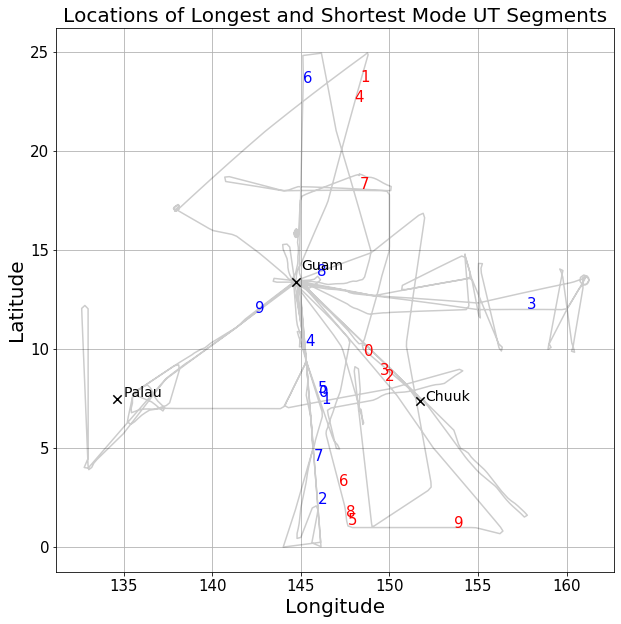

In [15]:
fig, ax = plt.subplots(figsize = [10, 10])
ax.scatter(long10.GGLON, long10.GGLAT, color = 'b', alpha = 0)
ax.scatter(short10.GGLON, short10.GGLAT, color = 'r', alpha = 0)
for i in np.arange(0, len(long10)):
    plt.text(long10.GGLON[i], long10.GGLAT[i], str(i), fontsize = 15, color = 'b')
    plt.text(short10.GGLON[i], short10.GGLAT[i], str(i), fontsize = 15, color = 'r')

ax.grid(which = 'major')
ax.set_title('Locations of Longest and Shortest Mode UT Segments', fontsize = 20)
ax.set_xlabel('Longitude', fontsize = 20)
ax.set_ylabel('Latitude', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# landmarks
# guam 
plt.scatter(144.7, 13.4, s = 70, marker = 'x', color = 'k')
plt.text(145, 14, 'Guam', fontsize = 14)
# chuuk 
plt.scatter(151.7, 7.4, s = 70, marker = 'x', color = 'k')
plt.text(152, 7.4, 'Chuuk', fontsize = 14)
# palau 
plt.scatter(134.6, 7.5, s = 70, marker = 'x', color = 'k')
plt.text(135, 7.6, 'Palau', fontsize = 14)

# 
plt.plot(toga_trc.GGLON, toga_trc.GGLAT, color = 'k', alpha = 0.2)
